<a href="https://colab.research.google.com/github/32173313/Data_Science/blob/main/Week6_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \
**Email:**

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [37]:
#Todo
# Split strategy and reasoning: Divide the 100 people into three groups (80 for training, 10 for validation, and 10 for testing)
# so that the model can learn to generalize to "new people". After training, fine-tune the model using Kilian's speech data to make
# it more accurate for Kilian's voice, while retaining a small portion of the original data to prevent the model from only remembering Kilian's voice.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


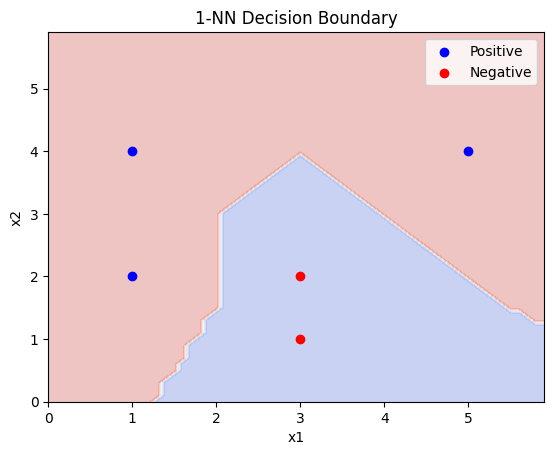

In [38]:
#Todo
# 1. 1-NN Classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[1, 2],[1, 4],[5, 4],[3, 1],[3, 2]])
y = np.array([1, 1, 1, 0, 0])  # 1=positive, 0=negative

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

xx, yy = np.meshgrid(np.arange(0, 6, 0.1), np.arange(0, 6, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Positive')
plt.scatter(X[y==0,0], X[y==0,1], color='red', label='Negative')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('1-NN Decision Boundary')
plt.show()


# 2. Feature Scaling
# (500, 1) would be positive before scaling and be negative after scaling.

# 3. Handling Missing Values
# I can replace missing values with the mean, median, or mode of that feature in the training set.

# 4. High-dimensional Data
# Although images have thousands of pixels, K-NN can still perform well because similar images have similar pixel patterns,
# so their feature vectors are close in the high-dimensional space.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [39]:
#Todo
# 1. Just computing h(x) doesn’t tell us which error is higher — we must explicitly compute the misclassification rates on both sets.
# 2. The perceptron automatically ensures zero training error upon convergence, so there’s no need to explicitly calculate it.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [40]:
# Todo
X = np.array([[10, -2], [12,  2]])
y = np.array([1, -1])

w = np.array([0, 0])
b = 0.0
eta = 1
updates = 0

converged = False
while not converged:
    converged = True
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w = w + eta * y[i] * X[i]
            b = b + eta * y[i]
            updates += 1
            converged = False
            print(f"Update {updates}: w = {w}, b = {b}")

print("\nTraining complete")
print(f"Total updates = {updates}")
print(f"Final weights = {w}, bias = {b}")

Update 1: w = [10 -2], b = 1.0
Update 2: w = [-2 -4], b = 0.0
Update 3: w = [ 8 -6], b = 1.0
Update 4: w = [-4 -8], b = 0.0
Update 5: w = [  6 -10], b = 1.0
Update 6: w = [ -6 -12], b = 0.0
Update 7: w = [  4 -14], b = 1.0
Update 8: w = [ -8 -16], b = 0.0
Update 9: w = [  2 -18], b = 1.0

Training complete
Total updates = 9
Final weights = [  2 -18], bias = 1.0


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [41]:
#Todo
updates = [
    ([0, 0, 0, 0, 4], 1, 2),
    ([0, 0, 6, 5, 0], 1, 1),
    ([3, 0, 0, 0, 0], -1, 1),
    ([0, 9, 3, 6, 0], -1, 1),
    ([0, 1, 0, 2, 5], -1, 1)
]

w = np.array([0, 0, 0, 0, 0])
lr = 1

print("Initial weight:", w)
print()

for x, y, count in updates:
    x = np.array(x)
    for _ in range(count):
        w += lr * y * x
        print(f"Update with x={x}, y={y:+d}: w = {w}")

print()
print("Final weight vector:", w)

Initial weight: [0 0 0 0 0]

Update with x=[0 0 0 0 4], y=+1: w = [0 0 0 0 4]
Update with x=[0 0 0 0 4], y=+1: w = [0 0 0 0 8]
Update with x=[0 0 6 5 0], y=+1: w = [0 0 6 5 8]
Update with x=[3 0 0 0 0], y=-1: w = [-3  0  6  5  8]
Update with x=[0 9 3 6 0], y=-1: w = [-3 -9  3 -1  8]
Update with x=[0 1 0 2 5], y=-1: w = [ -3 -10   3  -3   3]

Final weight vector: [ -3 -10   3  -3   3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Converged at epoch 2


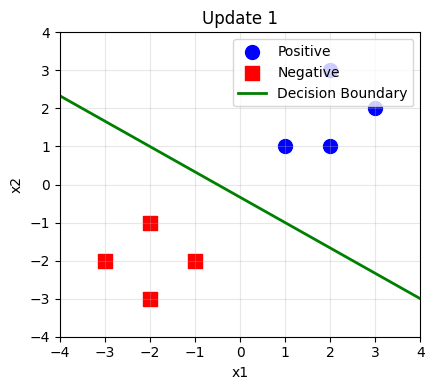

Final weights: w = [0.2 0.3], b = 0.1


In [42]:
# Todo
X = np.array([[2, 3], [1, 1], [2, 1], [3, 2], [-2, -1], [-1, -2], [-3, -2], [-2, -3]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

w = np.array([0.0, 0.0])
b = 0.0
lr = 0.1

plt.figure(figsize=(12, 4))
plot_count = 0

for epoch in range(20):
    updated = False
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w += lr * y[i] * X[i]
            b += lr * y[i]
            updated = True

            if plot_count < 3:
                plot_count += 1
                plt.subplot(1, 3, plot_count)
                plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='o', s=100, label='Positive')
                plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', marker='s', s=100, label='Negative')

                x1 = np.linspace(-4, 4, 100)
                if w[1] != 0:
                    x2 = -(w[0] * x1 + b) / w[1]
                    plt.plot(x1, x2, 'g-', linewidth=2, label='Decision Boundary')

                plt.xlim(-4, 4)
                plt.ylim(-4, 4)
                plt.xlabel('x1')
                plt.ylabel('x2')
                plt.title(f'Update {epoch + 1}')
                plt.legend()
                plt.grid(True, alpha=0.3)

    if not updated:
        print(f'Converged at epoch {epoch + 1}')
        break

plt.tight_layout()
plt.show()
print(f'Final weights: w = {w}, b = {b}')